# Оптимизаторы: сравнение и настройка

Исследование различных оптимизаторов для обучения нейронных сетей, включая сравнение их производительности, поиск оптимальных learning rates, анализ градиентов и влияние weight decay.


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from wine_quality_data import WineQualityDataModule
from mlp_model import MLPClassifier
from lightning_module import BaseLightningModule
from utils import set_seed
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import Callback

sns.set_style("whitegrid")
set_seed(42)


## 1. Сравнение различных оптимизаторов

Исследуем различные оптимизаторы для обучения нейронных сетей:

**SGD (Stochastic Gradient Descent)**: базовый градиентный спуск

$$\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)$$

где $\eta$ - learning rate, $\nabla_\theta L$ - градиент функции потерь.

**SGD с Momentum**: добавляет инерцию к обновлениям

$$v_{t+1} = \mu v_t + \nabla_\theta L(\theta_t)$$
$$\theta_{t+1} = \theta_t - \eta v_{t+1}$$

где $\mu$ - коэффициент momentum (обычно 0.9).

**RMSProp**: адаптивный learning rate на основе скользящего среднего квадратов градиентов

$$E[g^2]_t = \beta E[g^2]_{t-1} + (1-\beta)g_t^2$$
$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$$

**Adam**: комбинирует идеи Momentum и RMSProp

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$
$$\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}$$
$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$

**AdamW**: Adam с правильной реализацией weight decay

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t - \lambda \theta_t$$

где $\lambda$ - weight decay.

Сравним производительность этих оптимизаторов на задаче мультиклассовой классификации.


Обучаем модели с разными оптимизаторами на одинаковой архитектуре и сравниваем их производительность по метрикам и динамике обучения.


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA L40') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Количество классов: 6
Размерность входных данных: 11

Обучение с SGD
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2991, f1_macro=0.1289
Epoch 1: accuracy=0.3555, f1_macro=0.1426
Epoch 2: accuracy=0.3814, f1_macro=0.1486
Epoch 3: accuracy=0.4013, f1_macro=0.1536
Epoch 4: accuracy=0.4120, f1_macro=0.1557
Epoch 5: accuracy=0.4185, f1_macro=0.1564
Epoch 6: accuracy=0.4244, f1_macro=0.1571
Epoch 7: accuracy=0.4282, f1_macro=0.1569
Epoch 8: accuracy=0.4318, f1_macro=0.1565
Epoch 9: accuracy=0.4342, f1_macro=0.1556
Epoch 10: accuracy=0.4345, f1_macro=0.1539
Epoch 11: accuracy=0.4350, f1_macro=0.1524
Epoch 12: accuracy=0.4354, f1_macro=0.1510
Epoch 13: accuracy=0.4351, f1_macro=0.1493
Epoch 14: accuracy=0.4349, f1_macro=0.1478
Epoch 15: accuracy=0.4348, f1_macro=0.1464
Epoch 16: accuracy=0.4350, f1_macro=0.1452


`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 17: accuracy=0.4353, f1_macro=0.1443
Epoch 18: accuracy=0.4356, f1_macro=0.1435
Epoch 19: accuracy=0.4358, f1_macro=0.1427


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучение с SGD+Momentum
Epoch 0: accuracy=0.0781, f1_macro=0.0372
Epoch 0: accuracy=0.3259, f1_macro=0.1121
Epoch 1: accuracy=0.3685, f1_macro=0.1137
Epoch 2: accuracy=0.4108, f1_macro=0.1447
Epoch 3: accuracy=0.4354, f1_macro=0.1585
Epoch 4: accuracy=0.4537, f1_macro=0.1692
Epoch 5: accuracy=0.4673, f1_macro=0.1756
Epoch 6: accuracy=0.4793, f1_macro=0.1813
Epoch 7: accuracy=0.4881, f1_macro=0.1850
Epoch 8: accuracy=0.4957, f1_macro=0.1878
Epoch 9: accuracy=0.5015, f1_macro=0.1901
Epoch 10: accuracy=0.5071, f1_macro=0.1922
Epoch 11: accuracy=0.5118, f1_macro=0.1937
Epoch 12: accuracy=0.5152, f1_macro=0.1947
Epoch 13: accuracy=0.5187, f1_macro=0.1969
Epoch 14: accuracy=0.5215, f1_macro=0.1977
Epoch 15: accuracy=0.5248, f1_macro=0.2005
Epoch 16: accuracy=0.5273, f1_macro=0.2015
Epoch 17: accuracy=0.5299, f1_macro=0.2036
Epoch 18: accuracy=0.5330, f1_macro=0.2070


`Trainer.fit` stopped: `max_epochs=20` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 19: accuracy=0.5349, f1_macro=0.2080

Обучение с RMSProp
Epoch 0: accuracy=0.1328, f1_macro=0.0479
Epoch 0: accuracy=0.4241, f1_macro=0.1958
Epoch 1: accuracy=0.4961, f1_macro=0.2186
Epoch 2: accuracy=0.5202, f1_macro=0.2264
Epoch 3: accuracy=0.5369, f1_macro=0.2369
Epoch 4: accuracy=0.5492, f1_macro=0.2448
Epoch 5: accuracy=0.5562, f1_macro=0.2513
Epoch 6: accuracy=0.5621, f1_macro=0.2549
Epoch 7: accuracy=0.5662, f1_macro=0.2568
Epoch 8: accuracy=0.5708, f1_macro=0.2595
Epoch 9: accuracy=0.5742, f1_macro=0.2623
Epoch 10: accuracy=0.5776, f1_macro=0.2653
Epoch 11: accuracy=0.5796, f1_macro=0.2683
Epoch 12: accuracy=0.5823, f1_macro=0.2706
Epoch 13: accuracy=0.5853, f1_macro=0.2737
Epoch 14: accuracy=0.5866, f1_macro=0.2745
Epoch 15: accuracy=0.5884, f1_macro=0.2767
Epoch 16: accuracy=0.5903, f1_macro=0.2780
Epoch 17: accuracy=0.5915, f1_macro=0.2781


`Trainer.fit` stopped: `max_epochs=20` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 18: accuracy=0.5933, f1_macro=0.2789
Epoch 19: accuracy=0.5951, f1_macro=0.2806

Обучение с Adam


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.4297, f1_macro=0.1202
Epoch 0: accuracy=0.4085, f1_macro=0.0967
Epoch 1: accuracy=0.4544, f1_macro=0.1620
Epoch 2: accuracy=0.4816, f1_macro=0.1756
Epoch 3: accuracy=0.5000, f1_macro=0.1832
Epoch 4: accuracy=0.5145, f1_macro=0.1887
Epoch 5: accuracy=0.5215, f1_macro=0.1914
Epoch 6: accuracy=0.5283, f1_macro=0.1949
Epoch 7: accuracy=0.5327, f1_macro=0.1963
Epoch 8: accuracy=0.5379, f1_macro=0.1997
Epoch 9: accuracy=0.5418, f1_macro=0.2015
Epoch 10: accuracy=0.5444, f1_macro=0.2022
Epoch 11: accuracy=0.5499, f1_macro=0.2091
Epoch 12: accuracy=0.5527, f1_macro=0.2121
Epoch 13: accuracy=0.5553, f1_macro=0.2148
Epoch 14: accuracy=0.5595, f1_macro=0.2194
Epoch 15: accuracy=0.5619, f1_macro=0.2219
Epoch 16: accuracy=0.5654, f1_macro=0.2263
Epoch 17: accuracy=0.5676, f1_macro=0.2295
Epoch 18: accuracy=0.5702, f1_macro=0.2330
Epoch 19: accuracy=0.5723, f1_macro=0.2359


`Trainer.fit` stopped: `max_epochs=20` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучение с AdamW
Epoch 0: accuracy=0.3516, f1_macro=0.1504
Epoch 0: accuracy=0.4621, f1_macro=0.1733
Epoch 1: accuracy=0.4844, f1_macro=0.1789
Epoch 2: accuracy=0.4991, f1_macro=0.1832
Epoch 3: accuracy=0.5107, f1_macro=0.1868
Epoch 4: accuracy=0.5191, f1_macro=0.1894
Epoch 5: accuracy=0.5254, f1_macro=0.1917
Epoch 6: accuracy=0.5300, f1_macro=0.1932
Epoch 7: accuracy=0.5353, f1_macro=0.1961
Epoch 8: accuracy=0.5376, f1_macro=0.1966
Epoch 9: accuracy=0.5421, f1_macro=0.2051
Epoch 10: accuracy=0.5447, f1_macro=0.2061
Epoch 11: accuracy=0.5469, f1_macro=0.2086
Epoch 12: accuracy=0.5497, f1_macro=0.2120
Epoch 13: accuracy=0.5514, f1_macro=0.2132
Epoch 14: accuracy=0.5540, f1_macro=0.2180
Epoch 15: accuracy=0.5551, f1_macro=0.2195
Epoch 16: accuracy=0.5578, f1_macro=0.2235
Epoch 17: accuracy=0.5598, f1_macro=0.2259
Epoch 18: accuracy=0.5615, f1_macro=0.2274


`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: accuracy=0.5634, f1_macro=0.2300

Сравнение финальных метрик:
      Optimizer  Accuracy  F1 Macro  F1 Weighted
0           SGD    0.4406    0.1216       0.3071
1  SGD+Momentum    0.5719    0.2230       0.5260
2       RMSProp    0.6312    0.3131       0.6117
3          Adam    0.6125    0.2847       0.5866
4         AdamW    0.6000    0.2739       0.5726


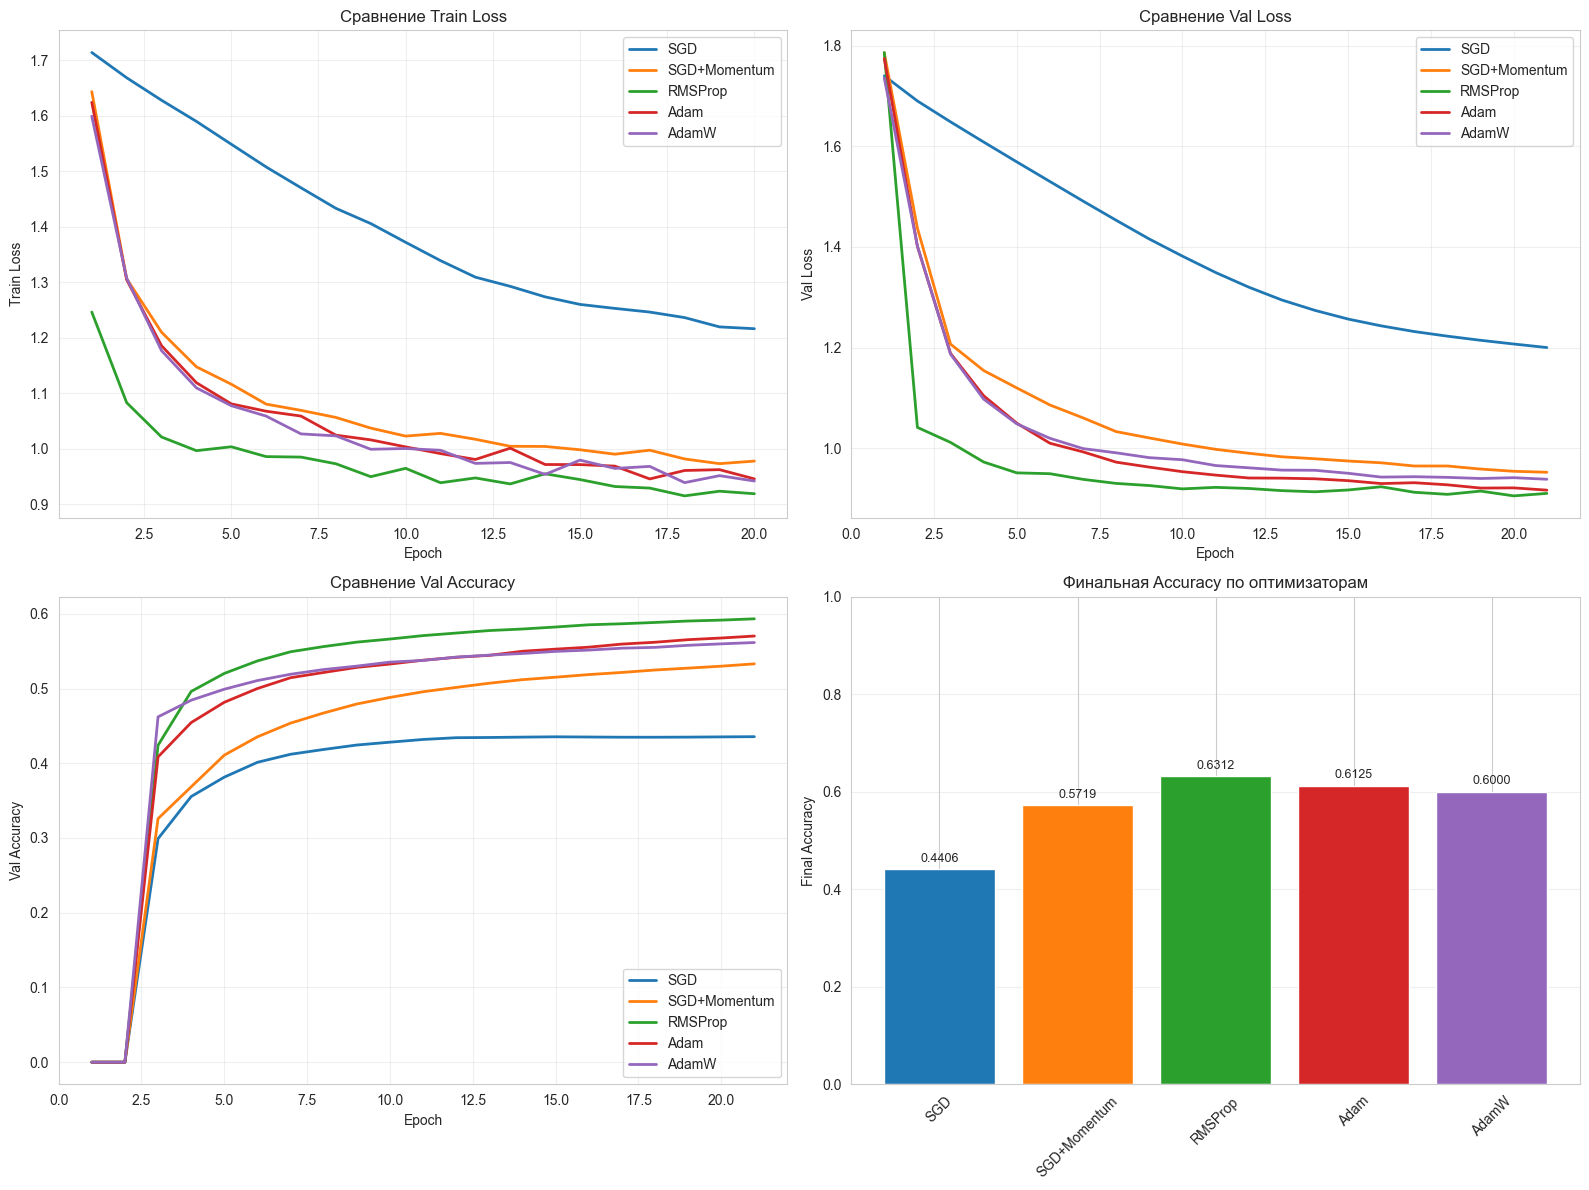

In [2]:
class MetricsCallback(Callback):
    def __init__(self):
        super().__init__()
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
    
    def on_train_epoch_end(self, trainer, pl_module):
        self.train_losses.append(trainer.callback_metrics.get('train_loss_epoch', torch.tensor(0.0)).item())
    
    def on_validation_epoch_end(self, trainer, pl_module):
        self.val_losses.append(trainer.callback_metrics.get('val_loss', torch.tensor(0.0)).item())
        if 'val_accuracy' in trainer.callback_metrics:
            self.val_accuracies.append(trainer.callback_metrics['val_accuracy'].item())
        else:
            self.val_accuracies.append(0.0)

data_module = WineQualityDataModule(batch_size=64, val_split=0.2, random_state=42)
data_module.setup()

print(f"Количество классов: {data_module.n_classes}")
print(f"Размерность входных данных: {data_module.input_dim}")

optimizers_config = {
    'SGD': {'type': 'sgd', 'lr': 0.01, 'kwargs': {}},
    'SGD+Momentum': {'type': 'sgd', 'lr': 0.01, 'kwargs': {'momentum': 0.9}},
    'RMSProp': {'type': 'rmsprop', 'lr': 0.001, 'kwargs': {}},
    'Adam': {'type': 'adam', 'lr': 0.001, 'kwargs': {}},
    'AdamW': {'type': 'adamw', 'lr': 0.001, 'kwargs': {'weight_decay': 0.01}}
}

results = {}

for opt_name, opt_config in optimizers_config.items():
    print(f"\n{'='*60}")
    print(f"Обучение с {opt_name}")
    print(f"{'='*60}")
    
    model = MLPClassifier(
        input_dim=data_module.input_dim,
        n_classes=data_module.n_classes,
        hidden_dims=[128, 64, 32],
        activation='relu',
        dropout=0.3
    )
    
    loss_fn = nn.CrossEntropyLoss()
    
    lightning_module = BaseLightningModule(
        model=model,
        loss_fn=loss_fn,
        optimizer_type=opt_config['type'],
        learning_rate=opt_config['lr'],
        optimizer_kwargs=opt_config['kwargs'],
        task_type='multiclass'
    )
    
    callback = MetricsCallback()
    
    trainer = Trainer(
        max_epochs=20,
        enable_progress_bar=False,
        enable_model_summary=False,
        callbacks=[callback]
    )
    
    trainer.fit(lightning_module, data_module)
    
    lightning_module.eval()
    model.eval()
    
    y_true_all = []
    y_pred_all = []
    
    with torch.no_grad():
        for batch in data_module.val_dataloader():
            x, y = batch
            logits = model(x)
            preds = torch.argmax(logits, dim=1)
            y_true_all.append(y.numpy())
            y_pred_all.append(preds.numpy())
    
    y_true = np.concatenate(y_true_all)
    y_pred = np.concatenate(y_pred_all)
    
    results[opt_name] = {
        'train_losses': callback.train_losses,
        'val_losses': callback.val_losses,
        'val_accuracies': callback.val_accuracies,
        'final_accuracy': accuracy_score(y_true, y_pred),
        'final_f1_macro': f1_score(y_true, y_pred, average='macro', zero_division=0),
        'final_f1_weighted': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

results_df = pd.DataFrame({
    'Optimizer': list(results.keys()),
    'Accuracy': [results[k]['final_accuracy'] for k in results.keys()],
    'F1 Macro': [results[k]['final_f1_macro'] for k in results.keys()],
    'F1 Weighted': [results[k]['final_f1_weighted'] for k in results.keys()]
})

print("\n" + "="*60)
print("Сравнение финальных метрик:")
print("="*60)
print(results_df.round(4))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for opt_name in results.keys():
    epochs_train = range(1, len(results[opt_name]['train_losses']) + 1)
    axes[0, 0].plot(epochs_train, results[opt_name]['train_losses'], label=opt_name, linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Train Loss')
axes[0, 0].set_title('Сравнение Train Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

for opt_name in results.keys():
    epochs_val = range(1, len(results[opt_name]['val_losses']) + 1)
    axes[0, 1].plot(epochs_val, results[opt_name]['val_losses'], label=opt_name, linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val Loss')
axes[0, 1].set_title('Сравнение Val Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

for opt_name in results.keys():
    if len(results[opt_name]['val_accuracies']) > 0:
        epochs_acc = range(1, len(results[opt_name]['val_accuracies']) + 1)
        axes[1, 0].plot(epochs_acc, results[opt_name]['val_accuracies'], label=opt_name, linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Val Accuracy')
axes[1, 0].set_title('Сравнение Val Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

bars = axes[1, 1].bar(results_df['Optimizer'], results_df['Accuracy'], 
                     color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[1, 1].set_ylabel('Final Accuracy')
axes[1, 1].set_title('Финальная Accuracy по оптимизаторам')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

for bar, val in zip(bars, results_df['Accuracy']):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{val:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 2. Поиск learning rate в лог-шкале

Learning rate - критический гиперпараметр, влияющий на скорость сходимости и качество модели. Поиск оптимального LR проводится в логарифмическом масштабе, так как влияние LR на обучение имеет экспоненциальный характер.

**Метод**: перебираем learning rates в диапазоне $[10^{-4}, 10^{-1}]$ в лог-шкале для каждого оптимизатора и выбираем LR, дающий наилучшую метрику на валидационной выборке.

Для каждого оптимизатора:
- Пробуем несколько LR в лог-шкале
- Обучаем модель с каждым LR на небольшое количество эпох
- Выбираем LR с лучшей валидационной метрикой


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Поиск LR для SGD
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0402, f1_macro=0.0258
Epoch 1: accuracy=0.0430, f1_macro=0.0274
Epoch 2: accuracy=0.0460, f1_macro=0.0292
Epoch 3: accuracy=0.0476, f1_macro=0.0302
Epoch 4: accuracy=0.0486, f1_macro=0.0308
Epoch 5: accuracy=0.0493, f1_macro=0.0312
Epoch 6: accuracy=0.0498, f1_macro=0.0315


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.0502, f1_macro=0.0317
Epoch 8: accuracy=0.0509, f1_macro=0.0320
Epoch 9: accuracy=0.0514, f1_macro=0.0323


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.000100: Accuracy=0.0563, F1_macro=0.0349
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0424, f1_macro=0.0271
Epoch 1: accuracy=0.0469, f1_macro=0.0298
Epoch 2: accuracy=0.0487, f1_macro=0.0308
Epoch 3: accuracy=0.0497, f1_macro=0.0313
Epoch 4: accuracy=0.0509, f1_macro=0.0320
Epoch 5: accuracy=0.0518, f1_macro=0.0324
Epoch 6: accuracy=0.0528, f1_macro=0.0330


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.0543, f1_macro=0.0338
Epoch 8: accuracy=0.0555, f1_macro=0.0344
Epoch 9: accuracy=0.0565, f1_macro=0.0348


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.000215: Accuracy=0.0656, F1_macro=0.0384
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0446, f1_macro=0.0285
Epoch 1: accuracy=0.0495, f1_macro=0.0312
Epoch 2: accuracy=0.0524, f1_macro=0.0328
Epoch 3: accuracy=0.0554, f1_macro=0.0343
Epoch 4: accuracy=0.0596, f1_macro=0.0367
Epoch 5: accuracy=0.0654, f1_macro=0.0400
Epoch 6: accuracy=0.0722, f1_macro=0.0441


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.0811, f1_macro=0.0492
Epoch 8: accuracy=0.0911, f1_macro=0.0550
Epoch 9: accuracy=0.1040, f1_macro=0.0623


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.000464: Accuracy=0.2250, F1_macro=0.1147
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0469, f1_macro=0.0295
Epoch 1: accuracy=0.0547, f1_macro=0.0335
Epoch 2: accuracy=0.0708, f1_macro=0.0432
Epoch 3: accuracy=0.0916, f1_macro=0.0552
Epoch 4: accuracy=0.1262, f1_macro=0.0739
Epoch 5: accuracy=0.1592, f1_macro=0.0886
Epoch 6: accuracy=0.1867, f1_macro=0.0991


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.2121, f1_macro=0.1077
Epoch 8: accuracy=0.2324, f1_macro=0.1139
Epoch 9: accuracy=0.2494, f1_macro=0.1187


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.001000: Accuracy=0.4094, F1_macro=0.1497
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0558, f1_macro=0.0336
Epoch 1: accuracy=0.1081, f1_macro=0.0642
Epoch 2: accuracy=0.1783, f1_macro=0.0950
Epoch 3: accuracy=0.2294, f1_macro=0.1121
Epoch 4: accuracy=0.2627, f1_macro=0.1214
Epoch 5: accuracy=0.2866, f1_macro=0.1276
Epoch 6: accuracy=0.3045, f1_macro=0.1320


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.3181, f1_macro=0.1352
Epoch 8: accuracy=0.3298, f1_macro=0.1381
Epoch 9: accuracy=0.3404, f1_macro=0.1408


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.002154: Accuracy=0.4406, F1_macro=0.1605
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.1674, f1_macro=0.0936
Epoch 1: accuracy=0.2682, f1_macro=0.1243
Epoch 2: accuracy=0.3125, f1_macro=0.1351
Epoch 3: accuracy=0.3409, f1_macro=0.1420
Epoch 4: accuracy=0.3594, f1_macro=0.1463
Epoch 5: accuracy=0.3726, f1_macro=0.1493
Epoch 6: accuracy=0.3834, f1_macro=0.1519
Epoch 7: accuracy=0.3925, f1_macro=0.1540
Epoch 8: accuracy=0.3999, f1_macro=0.1558


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4062, f1_macro=0.1571
  LR=0.004642: Accuracy=0.4656, F1_macro=0.1654
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2991, f1_macro=0.1289
Epoch 1: accuracy=0.3555, f1_macro=0.1426
Epoch 2: accuracy=0.3814, f1_macro=0.1486
Epoch 3: accuracy=0.4013, f1_macro=0.1536
Epoch 4: accuracy=0.4120, f1_macro=0.1557
Epoch 5: accuracy=0.4185, f1_macro=0.1564
Epoch 6: accuracy=0.4244, f1_macro=0.1571
Epoch 7: accuracy=0.4282, f1_macro=0.1569
Epoch 8: accuracy=0.4318, f1_macro=0.1565


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4342, f1_macro=0.1556
  LR=0.010000: Accuracy=0.4562, F1_macro=0.1371
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3192, f1_macro=0.1374
Epoch 1: accuracy=0.3841, f1_macro=0.1531
Epoch 2: accuracy=0.4072, f1_macro=0.1563
Epoch 3: accuracy=0.4176, f1_macro=0.1554
Epoch 4: accuracy=0.4259, f1_macro=0.1542
Epoch 5: accuracy=0.4287, f1_macro=0.1512
Epoch 6: accuracy=0.4295, f1_macro=0.1481
Epoch 7: accuracy=0.4301, f1_macro=0.1454


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.4312, f1_macro=0.1435
Epoch 9: accuracy=0.4321, f1_macro=0.1415
  LR=0.021544: Accuracy=0.4406, F1_macro=0.1146
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3504, f1_macro=0.1486
Epoch 1: accuracy=0.3984, f1_macro=0.1528
Epoch 2: accuracy=0.4108, f1_macro=0.1466
Epoch 3: accuracy=0.4141, f1_macro=0.1393
Epoch 4: accuracy=0.4265, f1_macro=0.1423
Epoch 5: accuracy=0.4355, f1_macro=0.1454
Epoch 6: accuracy=0.4438, f1_macro=0.1487
Epoch 7: accuracy=0.4542, f1_macro=0.1541
Epoch 8: accuracy=0.4624, f1_macro=0.1589


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4703, f1_macro=0.1629
  LR=0.046416: Accuracy=0.5437, F1_macro=0.1948
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3438, f1_macro=0.1348
Epoch 1: accuracy=0.3958, f1_macro=0.1404
Epoch 2: accuracy=0.4182, f1_macro=0.1430
Epoch 3: accuracy=0.4382, f1_macro=0.1511
Epoch 4: accuracy=0.4589, f1_macro=0.1630
Epoch 5: accuracy=0.4727, f1_macro=0.1696
Epoch 6: accuracy=0.4840, f1_macro=0.1763


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.4940, f1_macro=0.1815
Epoch 8: accuracy=0.5020, f1_macro=0.1847
Epoch 9: accuracy=0.5093, f1_macro=0.1916


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.100000: Accuracy=0.5781, F1_macro=0.2485

  Лучший LR для SGD: 0.100000 (F1_macro=0.2485)

Поиск LR для SGD+Momentum
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0446, f1_macro=0.0283
Epoch 1: accuracy=0.0521, f1_macro=0.0325
Epoch 2: accuracy=0.0607, f1_macro=0.0372
Epoch 3: accuracy=0.0781, f1_macro=0.0475
Epoch 4: accuracy=0.1036, f1_macro=0.0624
Epoch 5: accuracy=0.1353, f1_macro=0.0783
Epoch 6: accuracy=0.1647, f1_macro=0.0909


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.1908, f1_macro=0.1005
Epoch 8: accuracy=0.2134, f1_macro=0.1080
Epoch 9: accuracy=0.2323, f1_macro=0.1137


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.000100: Accuracy=0.4094, F1_macro=0.1497
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0491, f1_macro=0.0309
Epoch 1: accuracy=0.0794, f1_macro=0.0491
Epoch 2: accuracy=0.1452, f1_macro=0.0833
Epoch 3: accuracy=0.1989, f1_macro=0.1030
Epoch 4: accuracy=0.2384, f1_macro=0.1153
Epoch 5: accuracy=0.2656, f1_macro=0.1227
Epoch 6: accuracy=0.2859, f1_macro=0.1279
Epoch 7: accuracy=0.3021, f1_macro=0.1319
Epoch 8: accuracy=0.3162, f1_macro=0.1354


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.3269, f1_macro=0.1380
  LR=0.000215: Accuracy=0.4281, F1_macro=0.1563
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0759, f1_macro=0.0460
Epoch 1: accuracy=0.2005, f1_macro=0.1031
Epoch 2: accuracy=0.2629, f1_macro=0.1216
Epoch 3: accuracy=0.2976, f1_macro=0.1303
Epoch 4: accuracy=0.3241, f1_macro=0.1373
Epoch 5: accuracy=0.3423, f1_macro=0.1417
Epoch 6: accuracy=0.3556, f1_macro=0.1448


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.3679, f1_macro=0.1479
Epoch 8: accuracy=0.3777, f1_macro=0.1503
Epoch 9: accuracy=0.3861, f1_macro=0.1523
  LR=0.000464: Accuracy=0.4656, F1_macro=0.1672


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2478, f1_macro=0.1183
Epoch 1: accuracy=0.3268, f1_macro=0.1386
Epoch 2: accuracy=0.3594, f1_macro=0.1455
Epoch 3: accuracy=0.3786, f1_macro=0.1495
Epoch 4: accuracy=0.3953, f1_macro=0.1533
Epoch 5: accuracy=0.4053, f1_macro=0.1549
Epoch 6: accuracy=0.4122, f1_macro=0.1559
Epoch 7: accuracy=0.4185, f1_macro=0.1566


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.4222, f1_macro=0.1563
Epoch 9: accuracy=0.4261, f1_macro=0.1560
  LR=0.001000: Accuracy=0.4625, F1_macro=0.1458
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3080, f1_macro=0.1328
Epoch 1: accuracy=0.3763, f1_macro=0.1500
Epoch 2: accuracy=0.4007, f1_macro=0.1545
Epoch 3: accuracy=0.4134, f1_macro=0.1562
Epoch 4: accuracy=0.4225, f1_macro=0.1556
Epoch 5: accuracy=0.4282, f1_macro=0.1543
Epoch 6: accuracy=0.4316, f1_macro=0.1525
Epoch 7: accuracy=0.4319, f1_macro=0.1497
Epoch 8: accuracy=0.4322, f1_macro=0.1470


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4330, f1_macro=0.1453
  LR=0.002154: Accuracy=0.4406, F1_macro=0.1216
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3348, f1_macro=0.1435
Epoch 1: accuracy=0.3867, f1_macro=0.1497
Epoch 2: accuracy=0.4118, f1_macro=0.1512
Epoch 3: accuracy=0.4226, f1_macro=0.1491
Epoch 4: accuracy=0.4236, f1_macro=0.1433
Epoch 5: accuracy=0.4351, f1_macro=0.1473
Epoch 6: accuracy=0.4413, f1_macro=0.1490
Epoch 7: accuracy=0.4479, f1_macro=0.1514
Epoch 8: accuracy=0.4571, f1_macro=0.1560


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4645, f1_macro=0.1599
  LR=0.004642: Accuracy=0.5344, F1_macro=0.1908
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3393, f1_macro=0.1393
Epoch 1: accuracy=0.3802, f1_macro=0.1344
Epoch 2: accuracy=0.4035, f1_macro=0.1355
Epoch 3: accuracy=0.4226, f1_macro=0.1405
Epoch 4: accuracy=0.4439, f1_macro=0.1536
Epoch 5: accuracy=0.4600, f1_macro=0.1624
Epoch 6: accuracy=0.4704, f1_macro=0.1674
Epoch 7: accuracy=0.4807, f1_macro=0.1721


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.4890, f1_macro=0.1759
Epoch 9: accuracy=0.4949, f1_macro=0.1784
  LR=0.010000: Accuracy=0.5500, F1_macro=0.1995
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3415, f1_macro=0.1288
Epoch 1: accuracy=0.3919, f1_macro=0.1354
Epoch 2: accuracy=0.4329, f1_macro=0.1540
Epoch 3: accuracy=0.4588, f1_macro=0.1650
Epoch 4: accuracy=0.4850, f1_macro=0.1935
Epoch 5: accuracy=0.4976, f1_macro=0.1968
Epoch 6: accuracy=0.5051, f1_macro=0.1977
Epoch 7: accuracy=0.5112, f1_macro=0.1984


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.5173, f1_macro=0.1996
Epoch 9: accuracy=0.5246, f1_macro=0.2107
  LR=0.021544: Accuracy=0.5938, F1_macro=0.2859
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3438, f1_macro=0.1287
Epoch 1: accuracy=0.4310, f1_macro=0.1657
Epoch 2: accuracy=0.4807, f1_macro=0.2164
Epoch 3: accuracy=0.5007, f1_macro=0.2177
Epoch 4: accuracy=0.5203, f1_macro=0.2337
Epoch 5: accuracy=0.5327, f1_macro=0.2419
Epoch 6: accuracy=0.5401, f1_macro=0.2410
Epoch 7: accuracy=0.5443, f1_macro=0.2384
Epoch 8: accuracy=0.5495, f1_macro=0.2372


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5535, f1_macro=0.2453
  LR=0.046416: Accuracy=0.5906, F1_macro=0.2938
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2924, f1_macro=0.0855
Epoch 1: accuracy=0.4128, f1_macro=0.1986
Epoch 2: accuracy=0.4614, f1_macro=0.2291
Epoch 3: accuracy=0.4901, f1_macro=0.2376
Epoch 4: accuracy=0.5087, f1_macro=0.2378
Epoch 5: accuracy=0.5234, f1_macro=0.2510
Epoch 6: accuracy=0.5325, f1_macro=0.2576


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5394, f1_macro=0.2624
Epoch 8: accuracy=0.5445, f1_macro=0.2629
Epoch 9: accuracy=0.5490, f1_macro=0.2666
  LR=0.100000: Accuracy=0.5906, F1_macro=0.2924

  Лучший LR для SGD+Momentum: 0.046416 (F1_macro=0.2938)

Поиск LR для RMSProp


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3549, f1_macro=0.1471
Epoch 1: accuracy=0.4102, f1_macro=0.1565
Epoch 2: accuracy=0.4292, f1_macro=0.1576
Epoch 3: accuracy=0.4411, f1_macro=0.1595
Epoch 4: accuracy=0.4554, f1_macro=0.1651
Epoch 5: accuracy=0.4692, f1_macro=0.1711
Epoch 6: accuracy=0.4776, f1_macro=0.1754
Epoch 7: accuracy=0.4851, f1_macro=0.1794


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.4907, f1_macro=0.1822
Epoch 9: accuracy=0.4952, f1_macro=0.1843
  LR=0.000100: Accuracy=0.5375, F1_macro=0.1931
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3527, f1_macro=0.1398
Epoch 1: accuracy=0.4271, f1_macro=0.1666
Epoch 2: accuracy=0.4614, f1_macro=0.1795
Epoch 3: accuracy=0.4801, f1_macro=0.1849
Epoch 4: accuracy=0.4919, f1_macro=0.1876
Epoch 5: accuracy=0.5024, f1_macro=0.1904
Epoch 6: accuracy=0.5084, f1_macro=0.1916
Epoch 7: accuracy=0.5141, f1_macro=0.1929
Epoch 8: accuracy=0.5189, f1_macro=0.1941


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5225, f1_macro=0.1949
  LR=0.000215: Accuracy=0.5563, F1_macro=0.2020
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3929, f1_macro=0.1684
Epoch 1: accuracy=0.4609, f1_macro=0.1840
Epoch 2: accuracy=0.4917, f1_macro=0.1909
Epoch 3: accuracy=0.5071, f1_macro=0.1938
Epoch 4: accuracy=0.5174, f1_macro=0.1960
Epoch 5: accuracy=0.5269, f1_macro=0.2052
Epoch 6: accuracy=0.5359, f1_macro=0.2141


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5413, f1_macro=0.2179
Epoch 8: accuracy=0.5455, f1_macro=0.2208
Epoch 9: accuracy=0.5487, f1_macro=0.2236


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.000464: Accuracy=0.5781, F1_macro=0.2480
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4062, f1_macro=0.1736
Epoch 1: accuracy=0.4727, f1_macro=0.1887
Epoch 2: accuracy=0.5110, f1_macro=0.2149
Epoch 3: accuracy=0.5270, f1_macro=0.2205
Epoch 4: accuracy=0.5422, f1_macro=0.2348
Epoch 5: accuracy=0.5522, f1_macro=0.2509
Epoch 6: accuracy=0.5600, f1_macro=0.2587
Epoch 7: accuracy=0.5632, f1_macro=0.2587
Epoch 8: accuracy=0.5665, f1_macro=0.2580


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5712, f1_macro=0.2620
  LR=0.001000: Accuracy=0.6156, F1_macro=0.2971
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4085, f1_macro=0.1746
Epoch 1: accuracy=0.4818, f1_macro=0.1957
Epoch 2: accuracy=0.5193, f1_macro=0.2402
Epoch 3: accuracy=0.5305, f1_macro=0.2357
Epoch 4: accuracy=0.5411, f1_macro=0.2369
Epoch 5: accuracy=0.5508, f1_macro=0.2537
Epoch 6: accuracy=0.5591, f1_macro=0.2626


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5662, f1_macro=0.2672
Epoch 8: accuracy=0.5711, f1_macro=0.2694
Epoch 9: accuracy=0.5757, f1_macro=0.2729


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.002154: Accuracy=0.6188, F1_macro=0.3028
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4018, f1_macro=0.1709
Epoch 1: accuracy=0.4714, f1_macro=0.1884
Epoch 2: accuracy=0.5156, f1_macro=0.2399
Epoch 3: accuracy=0.5362, f1_macro=0.2479
Epoch 4: accuracy=0.5503, f1_macro=0.2508
Epoch 5: accuracy=0.5562, f1_macro=0.2628
Epoch 6: accuracy=0.5638, f1_macro=0.2705
Epoch 7: accuracy=0.5699, f1_macro=0.2735
Epoch 8: accuracy=0.5751, f1_macro=0.2770
Epoch 9: accuracy=0.5790, f1_macro=0.2784


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.004642: Accuracy=0.6156, F1_macro=0.2912
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4129, f1_macro=0.1773
Epoch 1: accuracy=0.4779, f1_macro=0.1921
Epoch 2: accuracy=0.5092, f1_macro=0.2279
Epoch 3: accuracy=0.5256, f1_macro=0.2308
Epoch 4: accuracy=0.5365, f1_macro=0.2286
Epoch 5: accuracy=0.5474, f1_macro=0.2494
Epoch 6: accuracy=0.5549, f1_macro=0.2593


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5606, f1_macro=0.2638
Epoch 8: accuracy=0.5648, f1_macro=0.2668
Epoch 9: accuracy=0.5697, f1_macro=0.2690


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.010000: Accuracy=0.6156, F1_macro=0.2896
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3951, f1_macro=0.1707
Epoch 1: accuracy=0.4674, f1_macro=0.1876
Epoch 2: accuracy=0.5037, f1_macro=0.2041
Epoch 3: accuracy=0.5234, f1_macro=0.2202
Epoch 4: accuracy=0.5353, f1_macro=0.2219
Epoch 5: accuracy=0.5430, f1_macro=0.2366
Epoch 6: accuracy=0.5498, f1_macro=0.2438


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5536, f1_macro=0.2436
Epoch 8: accuracy=0.5578, f1_macro=0.2465
Epoch 9: accuracy=0.5646, f1_macro=0.2495
  LR=0.021544: Accuracy=0.6281, F1_macro=0.2776


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3036, f1_macro=0.1206
Epoch 1: accuracy=0.3698, f1_macro=0.1483
Epoch 2: accuracy=0.3934, f1_macro=0.1515
Epoch 3: accuracy=0.4013, f1_macro=0.1485
Epoch 4: accuracy=0.4213, f1_macro=0.1612
Epoch 5: accuracy=0.4399, f1_macro=0.1701
Epoch 6: accuracy=0.4519, f1_macro=0.1818
Epoch 7: accuracy=0.4617, f1_macro=0.1861


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.4688, f1_macro=0.1890
Epoch 9: accuracy=0.4772, f1_macro=0.1925
  LR=0.046416: Accuracy=0.5563, F1_macro=0.2244
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3103, f1_macro=0.0954
Epoch 1: accuracy=0.3477, f1_macro=0.1393
Epoch 2: accuracy=0.3704, f1_macro=0.1397
Epoch 3: accuracy=0.3828, f1_macro=0.1365
Epoch 4: accuracy=0.3860, f1_macro=0.1449
Epoch 5: accuracy=0.3921, f1_macro=0.1433
Epoch 6: accuracy=0.3965, f1_macro=0.1412
Epoch 7: accuracy=0.3999, f1_macro=0.1390
Epoch 8: accuracy=0.3999, f1_macro=0.1446


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4023, f1_macro=0.1430
  LR=0.100000: Accuracy=0.4250, F1_macro=0.0994

  Лучший LR для RMSProp: 0.002154 (F1_macro=0.3028)

Поиск LR для Adam
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0826, f1_macro=0.0462
Epoch 1: accuracy=0.1914, f1_macro=0.0954
Epoch 2: accuracy=0.2721, f1_macro=0.1226
Epoch 3: accuracy=0.3168, f1_macro=0.1341
Epoch 4: accuracy=0.3478, f1_macro=0.1422
Epoch 5: accuracy=0.3696, f1_macro=0.1469
Epoch 6: accuracy=0.3834, f1_macro=0.1487


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


Epoch 7: accuracy=0.3932, f1_macro=0.1497
Epoch 8: accuracy=0.4039, f1_macro=0.1524
Epoch 9: accuracy=0.4156, f1_macro=0.1568
  LR=0.000100: Accuracy=0.5250, F1_macro=0.1903


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2790, f1_macro=0.1280
Epoch 1: accuracy=0.3633, f1_macro=0.1492
Epoch 2: accuracy=0.4017, f1_macro=0.1564
Epoch 3: accuracy=0.4183, f1_macro=0.1567
Epoch 4: accuracy=0.4363, f1_macro=0.1627
Epoch 5: accuracy=0.4512, f1_macro=0.1692
Epoch 6: accuracy=0.4633, f1_macro=0.1748
Epoch 7: accuracy=0.4717, f1_macro=0.1786


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.4794, f1_macro=0.1815
Epoch 9: accuracy=0.4856, f1_macro=0.1835
  LR=0.000215: Accuracy=0.5437, F1_macro=0.1969
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3549, f1_macro=0.1497
Epoch 1: accuracy=0.4154, f1_macro=0.1610
Epoch 2: accuracy=0.4504, f1_macro=0.1717
Epoch 3: accuracy=0.4709, f1_macro=0.1803
Epoch 4: accuracy=0.4855, f1_macro=0.1851
Epoch 5: accuracy=0.4961, f1_macro=0.1881
Epoch 6: accuracy=0.5038, f1_macro=0.1902
Epoch 7: accuracy=0.5104, f1_macro=0.1920
Epoch 8: accuracy=0.5160, f1_macro=0.1935


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5204, f1_macro=0.1946
  LR=0.000464: Accuracy=0.5625, F1_macro=0.2050
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4362, f1_macro=0.1751
Epoch 2: accuracy=0.4678, f1_macro=0.1829
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1912
Epoch 5: accuracy=0.5107, f1_macro=0.1933
Epoch 6: accuracy=0.5198, f1_macro=0.1996


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5272, f1_macro=0.2046
Epoch 8: accuracy=0.5316, f1_macro=0.2064
Epoch 9: accuracy=0.5361, f1_macro=0.2095


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.001000: Accuracy=0.5781, F1_macro=0.2370
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3951, f1_macro=0.1700
Epoch 1: accuracy=0.4648, f1_macro=0.1858
Epoch 2: accuracy=0.4954, f1_macro=0.1925
Epoch 3: accuracy=0.5099, f1_macro=0.1966
Epoch 4: accuracy=0.5295, f1_macro=0.2260
Epoch 5: accuracy=0.5381, f1_macro=0.2247
Epoch 6: accuracy=0.5431, f1_macro=0.2253


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5491, f1_macro=0.2289
Epoch 8: accuracy=0.5519, f1_macro=0.2277
Epoch 9: accuracy=0.5556, f1_macro=0.2313


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.002154: Accuracy=0.5906, F1_macro=0.2625
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4196, f1_macro=0.2466
Epoch 1: accuracy=0.4818, f1_macro=0.2437
Epoch 2: accuracy=0.5202, f1_macro=0.2615
Epoch 3: accuracy=0.5341, f1_macro=0.2549
Epoch 4: accuracy=0.5451, f1_macro=0.2626
Epoch 5: accuracy=0.5571, f1_macro=0.2677
Epoch 6: accuracy=0.5621, f1_macro=0.2648
Epoch 7: accuracy=0.5658, f1_macro=0.2621
Epoch 8: accuracy=0.5678, f1_macro=0.2586
Epoch 9: accuracy=0.5718, f1_macro=0.2628


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.004642: Accuracy=0.6094, F1_macro=0.2961
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4308, f1_macro=0.2505
Epoch 1: accuracy=0.4948, f1_macro=0.2722
Epoch 2: accuracy=0.5267, f1_macro=0.2781
Epoch 3: accuracy=0.5405, f1_macro=0.2721
Epoch 4: accuracy=0.5521, f1_macro=0.2754
Epoch 5: accuracy=0.5605, f1_macro=0.2803
Epoch 6: accuracy=0.5688, f1_macro=0.2827


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5733, f1_macro=0.2828
Epoch 8: accuracy=0.5748, f1_macro=0.2788
Epoch 9: accuracy=0.5787, f1_macro=0.2815


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.010000: Accuracy=0.6156, F1_macro=0.3030
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4241, f1_macro=0.1923
Epoch 1: accuracy=0.4896, f1_macro=0.2432
Epoch 2: accuracy=0.5119, f1_macro=0.2546
Epoch 3: accuracy=0.5213, f1_macro=0.2471
Epoch 4: accuracy=0.5370, f1_macro=0.2534
Epoch 5: accuracy=0.5415, f1_macro=0.2542
Epoch 6: accuracy=0.5452, f1_macro=0.2544
Epoch 7: accuracy=0.5525, f1_macro=0.2603
Epoch 8: accuracy=0.5562, f1_macro=0.2615
Epoch 9: accuracy=0.5592, f1_macro=0.2654


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.021544: Accuracy=0.5875, F1_macro=0.2888
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3884, f1_macro=0.1678
Epoch 1: accuracy=0.4544, f1_macro=0.1918
Epoch 2: accuracy=0.4917, f1_macro=0.2064
Epoch 3: accuracy=0.5099, f1_macro=0.2086
Epoch 4: accuracy=0.5237, f1_macro=0.2100
Epoch 5: accuracy=0.5337, f1_macro=0.2212
Epoch 6: accuracy=0.5418, f1_macro=0.2315


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.5432, f1_macro=0.2359
Epoch 8: accuracy=0.5462, f1_macro=0.2353
Epoch 9: accuracy=0.5520, f1_macro=0.2404


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.046416: Accuracy=0.6062, F1_macro=0.2817
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2879, f1_macro=0.0956
Epoch 1: accuracy=0.3984, f1_macro=0.1582
Epoch 2: accuracy=0.4062, f1_macro=0.1630
Epoch 3: accuracy=0.4105, f1_macro=0.1589
Epoch 4: accuracy=0.4358, f1_macro=0.1671
Epoch 5: accuracy=0.4341, f1_macro=0.1622
Epoch 6: accuracy=0.4455, f1_macro=0.1648


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.4498, f1_macro=0.1641
Epoch 8: accuracy=0.4551, f1_macro=0.1645
Epoch 9: accuracy=0.4522, f1_macro=0.1608


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.100000: Accuracy=0.4250, F1_macro=0.0994

  Лучший LR для Adam: 0.010000 (F1_macro=0.3030)

Поиск LR для AdamW
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.0826, f1_macro=0.0462
Epoch 1: accuracy=0.1914, f1_macro=0.0954
Epoch 2: accuracy=0.2721, f1_macro=0.1226
Epoch 3: accuracy=0.3168, f1_macro=0.1341
Epoch 4: accuracy=0.3478, f1_macro=0.1422
Epoch 5: accuracy=0.3696, f1_macro=0.1469
Epoch 6: accuracy=0.3834, f1_macro=0.1487
Epoch 7: accuracy=0.3932, f1_macro=0.1497
Epoch 8: accuracy=0.4039, f1_macro=0.1524


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.4156, f1_macro=0.1568
  LR=0.000100: Accuracy=0.5250, F1_macro=0.1903
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2790, f1_macro=0.1280
Epoch 1: accuracy=0.3633, f1_macro=0.1492
Epoch 2: accuracy=0.4017, f1_macro=0.1564
Epoch 3: accuracy=0.4183, f1_macro=0.1567
Epoch 4: accuracy=0.4363, f1_macro=0.1627
Epoch 5: accuracy=0.4512, f1_macro=0.1692
Epoch 6: accuracy=0.4637, f1_macro=0.1750


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.4721, f1_macro=0.1788
Epoch 8: accuracy=0.4797, f1_macro=0.1816
Epoch 9: accuracy=0.4859, f1_macro=0.1836
  LR=0.000215: Accuracy=0.5437, F1_macro=0.1969


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3549, f1_macro=0.1497
Epoch 1: accuracy=0.4154, f1_macro=0.1610
Epoch 2: accuracy=0.4504, f1_macro=0.1717
Epoch 3: accuracy=0.4709, f1_macro=0.1803
Epoch 4: accuracy=0.4855, f1_macro=0.1851
Epoch 5: accuracy=0.4961, f1_macro=0.1881
Epoch 6: accuracy=0.5038, f1_macro=0.1902
Epoch 7: accuracy=0.5104, f1_macro=0.1920


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 8: accuracy=0.5160, f1_macro=0.1935
Epoch 9: accuracy=0.5204, f1_macro=0.1946
  LR=0.000464: Accuracy=0.5625, F1_macro=0.2050


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4362, f1_macro=0.1751
Epoch 2: accuracy=0.4678, f1_macro=0.1829
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1912
Epoch 5: accuracy=0.5107, f1_macro=0.1933
Epoch 6: accuracy=0.5198, f1_macro=0.1996
Epoch 7: accuracy=0.5275, f1_macro=0.2055


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.5322, f1_macro=0.2074
Epoch 9: accuracy=0.5370, f1_macro=0.2105
  LR=0.001000: Accuracy=0.5813, F1_macro=0.2383
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3951, f1_macro=0.1700
Epoch 1: accuracy=0.4648, f1_macro=0.1858
Epoch 2: accuracy=0.4954, f1_macro=0.1926
Epoch 3: accuracy=0.5107, f1_macro=0.1969
Epoch 4: accuracy=0.5289, f1_macro=0.2257
Epoch 5: accuracy=0.5381, f1_macro=0.2247
Epoch 6: accuracy=0.5435, f1_macro=0.2263
Epoch 7: accuracy=0.5506, f1_macro=0.2315
Epoch 8: accuracy=0.5535, f1_macro=0.2309


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5565, f1_macro=0.2339
  LR=0.002154: Accuracy=0.5844, F1_macro=0.2602
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4196, f1_macro=0.2466
Epoch 1: accuracy=0.4805, f1_macro=0.2431
Epoch 2: accuracy=0.5165, f1_macro=0.2589
Epoch 3: accuracy=0.5284, f1_macro=0.2516
Epoch 4: accuracy=0.5394, f1_macro=0.2594
Epoch 5: accuracy=0.5518, f1_macro=0.2665
Epoch 6: accuracy=0.5583, f1_macro=0.2653
Epoch 7: accuracy=0.5629, f1_macro=0.2632
Epoch 8: accuracy=0.5658, f1_macro=0.2600
Epoch 9: accuracy=0.5688, f1_macro=0.2630


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


  LR=0.004642: Accuracy=0.5969, F1_macro=0.2855
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4308, f1_macro=0.2505
Epoch 1: accuracy=0.4922, f1_macro=0.2711
Epoch 2: accuracy=0.5267, f1_macro=0.2783
Epoch 3: accuracy=0.5405, f1_macro=0.2731
Epoch 4: accuracy=0.5515, f1_macro=0.2764
Epoch 5: accuracy=0.5596, f1_macro=0.2784
Epoch 6: accuracy=0.5671, f1_macro=0.2805
Epoch 7: accuracy=0.5722, f1_macro=0.2824
Epoch 8: accuracy=0.5771, f1_macro=0.2832


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5796, f1_macro=0.2842
  LR=0.010000: Accuracy=0.6031, F1_macro=0.2904
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4174, f1_macro=0.1895
Epoch 1: accuracy=0.4883, f1_macro=0.2411
Epoch 2: accuracy=0.5092, f1_macro=0.2540
Epoch 3: accuracy=0.5220, f1_macro=0.2474
Epoch 4: accuracy=0.5359, f1_macro=0.2491
Epoch 5: accuracy=0.5454, f1_macro=0.2589
Epoch 6: accuracy=0.5549, f1_macro=0.2636
Epoch 7: accuracy=0.5621, f1_macro=0.2677


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 8: accuracy=0.5652, f1_macro=0.2648
Epoch 9: accuracy=0.5661, f1_macro=0.2664
  LR=0.021544: Accuracy=0.5750, F1_macro=0.2757
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3839, f1_macro=0.1640
Epoch 1: accuracy=0.4492, f1_macro=0.1808
Epoch 2: accuracy=0.4724, f1_macro=0.2013
Epoch 3: accuracy=0.4893, f1_macro=0.2113
Epoch 4: accuracy=0.4942, f1_macro=0.2056
Epoch 5: accuracy=0.5059, f1_macro=0.2261
Epoch 6: accuracy=0.5106, f1_macro=0.2307
Epoch 7: accuracy=0.5104, f1_macro=0.2255
Epoch 8: accuracy=0.5076, f1_macro=0.2231


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5141, f1_macro=0.2224
  LR=0.046416: Accuracy=0.5750, F1_macro=0.2078
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2924, f1_macro=0.0858
Epoch 1: accuracy=0.3477, f1_macro=0.1395
Epoch 2: accuracy=0.3704, f1_macro=0.1399
Epoch 3: accuracy=0.3828, f1_macro=0.1366
Epoch 4: accuracy=0.3860, f1_macro=0.1450
Epoch 5: accuracy=0.3921, f1_macro=0.1434
Epoch 6: accuracy=0.3965, f1_macro=0.1413
Epoch 7: accuracy=0.3999, f1_macro=0.1391
Epoch 8: accuracy=0.3999, f1_macro=0.1446


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: accuracy=0.4023, f1_macro=0.1431
  LR=0.100000: Accuracy=0.4250, F1_macro=0.0994

  Лучший LR для AdamW: 0.010000 (F1_macro=0.2904)


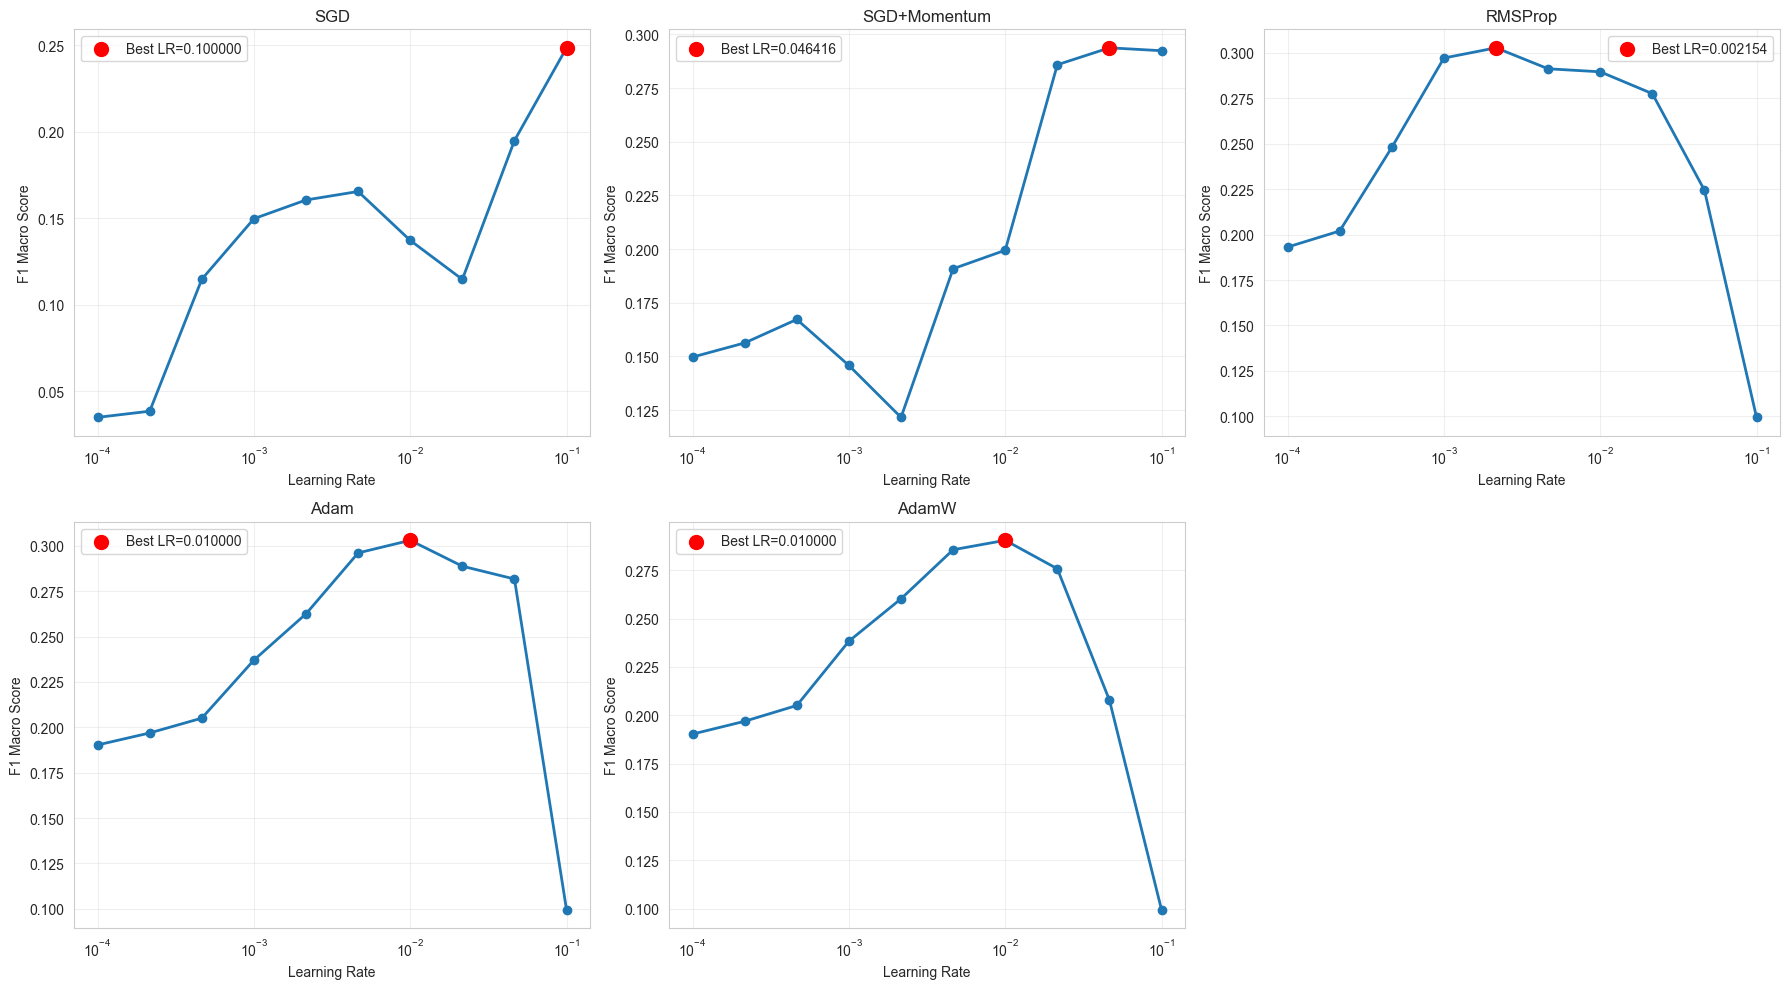


Оптимальные Learning Rates:
SGD                 : 0.100000
SGD+Momentum        : 0.046416
RMSProp             : 0.002154
Adam                : 0.010000
AdamW               : 0.010000


In [3]:
learning_rates = np.logspace(-4, -1, 10)

optimizers_lr_search = {
    'SGD': {'type': 'sgd', 'kwargs': {}},
    'SGD+Momentum': {'type': 'sgd', 'kwargs': {'momentum': 0.9}},
    'RMSProp': {'type': 'rmsprop', 'kwargs': {}},
    'Adam': {'type': 'adam', 'kwargs': {}},
    'AdamW': {'type': 'adamw', 'kwargs': {'weight_decay': 0.01}}
}

lr_results = {}

for opt_name, opt_config in optimizers_lr_search.items():
    print(f"\n{'='*60}")
    print(f"Поиск LR для {opt_name}")
    print(f"{'='*60}")
    
    lr_scores = []
    
    for lr in learning_rates:
        set_seed(42)
        
        model = MLPClassifier(
            input_dim=data_module.input_dim,
            n_classes=data_module.n_classes,
            hidden_dims=[128, 64, 32],
            activation='relu',
            dropout=0.3
        )
        
        loss_fn = nn.CrossEntropyLoss()
        
        lightning_module = BaseLightningModule(
            model=model,
            loss_fn=loss_fn,
            optimizer_type=opt_config['type'],
            learning_rate=lr,
            optimizer_kwargs=opt_config['kwargs'],
            task_type='multiclass'
        )
        
        trainer = Trainer(
            max_epochs=10,
            enable_progress_bar=False,
            enable_model_summary=False
        )
        
        trainer.fit(lightning_module, data_module)
        
        lightning_module.eval()
        model.eval()
        
        y_true_all = []
        y_pred_all = []
        
        with torch.no_grad():
            for batch in data_module.val_dataloader():
                x, y = batch
                logits = model(x)
                preds = torch.argmax(logits, dim=1)
                y_true_all.append(y.numpy())
                y_pred_all.append(preds.numpy())
        
        y_true = np.concatenate(y_true_all)
        y_pred = np.concatenate(y_pred_all)
        
        accuracy = accuracy_score(y_true, y_pred)
        f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
        
        lr_scores.append({
            'lr': lr,
            'accuracy': accuracy,
            'f1_macro': f1_macro
        })
        
        print(f"  LR={lr:.6f}: Accuracy={accuracy:.4f}, F1_macro={f1_macro:.4f}")
    
    lr_results[opt_name] = lr_scores
    
    best_lr = max(lr_scores, key=lambda x: x['f1_macro'])
    print(f"\n  Лучший LR для {opt_name}: {best_lr['lr']:.6f} (F1_macro={best_lr['f1_macro']:.4f})")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (opt_name, scores) in enumerate(lr_results.items()):
    ax = axes[idx]
    lrs = [s['lr'] for s in scores]
    f1_scores = [s['f1_macro'] for s in scores]
    
    ax.semilogx(lrs, f1_scores, marker='o', linewidth=2, markersize=6)
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('F1 Macro Score')
    ax.set_title(f'{opt_name}')
    ax.grid(True, alpha=0.3)
    
    best_idx = np.argmax(f1_scores)
    ax.scatter([lrs[best_idx]], [f1_scores[best_idx]], 
              color='red', s=100, zorder=5, label=f'Best LR={lrs[best_idx]:.6f}')
    ax.legend()

axes[-1].axis('off')

plt.tight_layout()
plt.show()

best_lrs = {}
for opt_name, scores in lr_results.items():
    best = max(scores, key=lambda x: x['f1_macro'])
    best_lrs[opt_name] = best['lr']
    
print("\n" + "="*60)
print("Оптимальные Learning Rates:")
print("="*60)
for opt_name, lr in best_lrs.items():
    print(f"{opt_name:20s}: {lr:.6f}")


## 3. Нормы градиентов при разных оптимизаторах

Норма градиента показывает, насколько "большие" градиенты получает модель. Это важный индикатор стабильности обучения:

- Слишком большие нормы градиентов могут указывать на нестабильность обучения
- Слишком маленькие нормы могут указывать на проблему исчезающих градиентов
- Резкие изменения норм могут указывать на проблемы с learning rate

**L2-норма градиента** вычисляется как:

$$||\nabla_\theta L||_2 = \sqrt{\sum_{i=1}^{n} \left(\frac{\partial L}{\partial \theta_i}\right)^2}$$

где $n$ - количество параметров модели, $\theta_i$ - $i$-й параметр.

Отслеживаем нормы градиентов в процессе обучения для разных оптимизаторов.


Обучаем модели с разными оптимизаторами и отслеживаем L2-нормы градиентов на каждом шаге обучения для анализа стабильности обучения.


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучаем SGD для отслеживания градиентов...
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2991, f1_macro=0.1289
Epoch 1: accuracy=0.3555, f1_macro=0.1426
Epoch 2: accuracy=0.3814, f1_macro=0.1486
Epoch 3: accuracy=0.4013, f1_macro=0.1536
Epoch 4: accuracy=0.4120, f1_macro=0.1557
Epoch 5: accuracy=0.4185, f1_macro=0.1564
Epoch 6: accuracy=0.4244, f1_macro=0.1571
Epoch 7: accuracy=0.4282, f1_macro=0.1569
Epoch 8: accuracy=0.4318, f1_macro=0.1565
Epoch 9: accuracy=0.4342, f1_macro=0.1556


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучаем SGD+Momentum для отслеживания градиентов...
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3393, f1_macro=0.1393
Epoch 1: accuracy=0.3802, f1_macro=0.1344
Epoch 2: accuracy=0.4035, f1_macro=0.1355
Epoch 3: accuracy=0.4226, f1_macro=0.1405
Epoch 4: accuracy=0.4439, f1_macro=0.1536
Epoch 5: accuracy=0.4600, f1_macro=0.1624
Epoch 6: accuracy=0.4704, f1_macro=0.1674


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 7: accuracy=0.4807, f1_macro=0.1721
Epoch 8: accuracy=0.4890, f1_macro=0.1759
Epoch 9: accuracy=0.4949, f1_macro=0.1784


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучаем RMSProp для отслеживания градиентов...
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4062, f1_macro=0.1736
Epoch 1: accuracy=0.4727, f1_macro=0.1887
Epoch 2: accuracy=0.5110, f1_macro=0.2149
Epoch 3: accuracy=0.5270, f1_macro=0.2205
Epoch 4: accuracy=0.5422, f1_macro=0.2348
Epoch 5: accuracy=0.5522, f1_macro=0.2509
Epoch 6: accuracy=0.5600, f1_macro=0.2587
Epoch 7: accuracy=0.5632, f1_macro=0.2587
Epoch 8: accuracy=0.5665, f1_macro=0.2580
Epoch 9: accuracy=0.5712, f1_macro=0.2620


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучаем Adam для отслеживания градиентов...
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4362, f1_macro=0.1751
Epoch 2: accuracy=0.4678, f1_macro=0.1829
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1912
Epoch 5: accuracy=0.5107, f1_macro=0.1933
Epoch 6: accuracy=0.5198, f1_macro=0.1996
Epoch 7: accuracy=0.5272, f1_macro=0.2046
Epoch 8: accuracy=0.5316, f1_macro=0.2064


`Trainer.fit` stopped: `max_epochs=10` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 9: accuracy=0.5361, f1_macro=0.2095

Обучаем AdamW для отслеживания градиентов...
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4362, f1_macro=0.1751
Epoch 2: accuracy=0.4678, f1_macro=0.1829
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1912
Epoch 5: accuracy=0.5107, f1_macro=0.1933
Epoch 6: accuracy=0.5198, f1_macro=0.1996
Epoch 7: accuracy=0.5275, f1_macro=0.2055
Epoch 8: accuracy=0.5322, f1_macro=0.2074


`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: accuracy=0.5370, f1_macro=0.2105


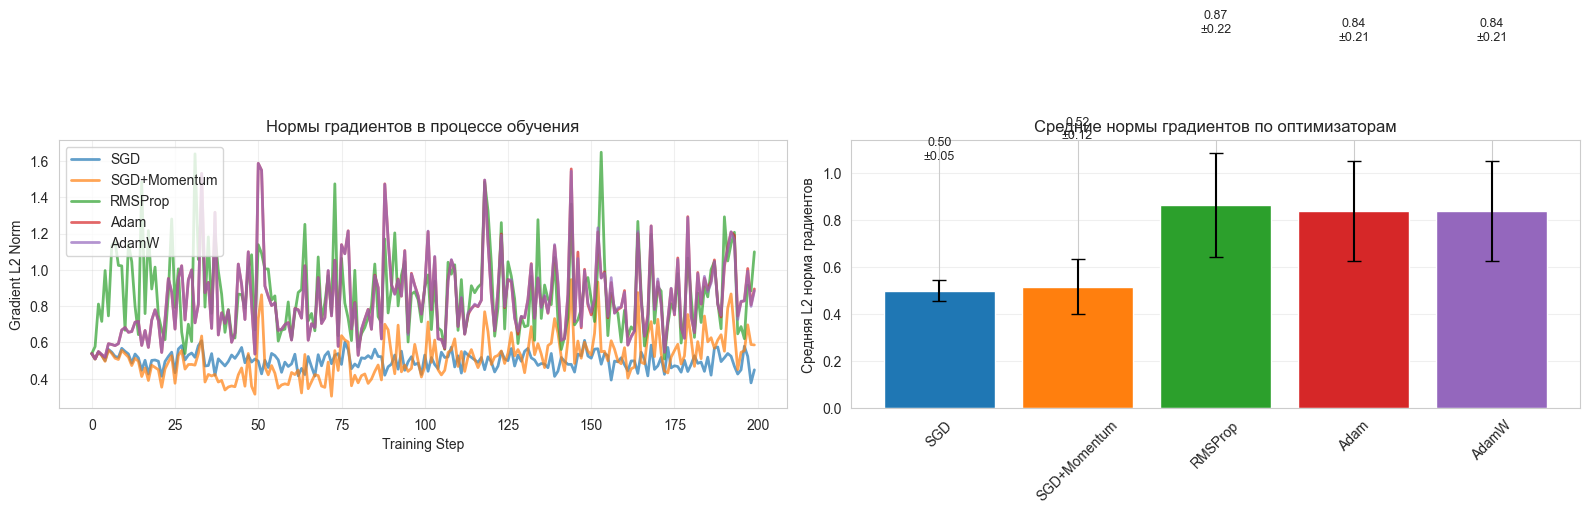


Статистика норм градиентов:
SGD                 : mean=0.5004, std=0.0453, min=0.3773, max=0.6115
SGD+Momentum        : mean=0.5179, std=0.1160, min=0.3040, max=0.9463
RMSProp             : mean=0.8667, std=0.2211, min=0.5088, max=1.6481
Adam                : mean=0.8405, std=0.2140, min=0.5100, max=1.5865
AdamW               : mean=0.8402, std=0.2133, min=0.5100, max=1.5865


In [4]:
class GradientNormCallback(Callback):
    def __init__(self):
        super().__init__()
        self.gradient_norms = []
    
    def on_after_backward(self, trainer, pl_module):
        total_norm = 0.0
        param_count = 0
        for p in pl_module.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
                param_count += 1
        total_norm = total_norm ** (1. / 2)
        self.gradient_norms.append(total_norm)

optimizers_grad = {
    'SGD': {'type': 'sgd', 'lr': 0.01, 'kwargs': {}},
    'SGD+Momentum': {'type': 'sgd', 'lr': 0.01, 'kwargs': {'momentum': 0.9}},
    'RMSProp': {'type': 'rmsprop', 'lr': 0.001, 'kwargs': {}},
    'Adam': {'type': 'adam', 'lr': 0.001, 'kwargs': {}},
    'AdamW': {'type': 'adamw', 'lr': 0.001, 'kwargs': {'weight_decay': 0.01}}
}

gradient_results = {}

for opt_name, opt_config in optimizers_grad.items():
    print(f"\nОбучаем {opt_name} для отслеживания градиентов...")
    
    set_seed(42)
    
    model = MLPClassifier(
        input_dim=data_module.input_dim,
        n_classes=data_module.n_classes,
        hidden_dims=[128, 64, 32],
        activation='relu',
        dropout=0.3
    )
    
    loss_fn = nn.CrossEntropyLoss()
    
    lightning_module = BaseLightningModule(
        model=model,
        loss_fn=loss_fn,
        optimizer_type=opt_config['type'],
        learning_rate=opt_config['lr'],
        optimizer_kwargs=opt_config['kwargs'],
        task_type='multiclass'
    )
    
    grad_callback = GradientNormCallback()
    
    trainer = Trainer(
        max_epochs=10,
        enable_progress_bar=False,
        enable_model_summary=False,
        callbacks=[grad_callback]
    )
    
    trainer.fit(lightning_module, data_module)
    
    gradient_results[opt_name] = grad_callback.gradient_norms

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

steps = range(len(list(gradient_results.values())[0]))

for opt_name in gradient_results.keys():
    norms = gradient_results[opt_name]
    if len(norms) > len(steps):
        norms = norms[:len(steps)]
    axes[0].plot(steps, norms, label=opt_name, linewidth=2, alpha=0.7)
axes[0].set_xlabel('Training Step')
axes[0].set_ylabel('Gradient L2 Norm')
axes[0].set_title('Нормы градиентов в процессе обучения')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

mean_norms = {name: np.mean(norms) for name, norms in gradient_results.items()}
std_norms = {name: np.std(norms) for name, norms in gradient_results.items()}

bars = axes[1].bar(mean_norms.keys(), mean_norms.values(), 
                   yerr=list(std_norms.values()), capsize=5,
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[1].set_ylabel('Средняя L2 норма градиентов')
axes[1].set_title('Средние нормы градиентов по оптимизаторам')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

for bar, (mean, std) in zip(bars, zip(mean_norms.values(), std_norms.values())):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.5,
                f'{mean:.2f}\n±{std:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Статистика норм градиентов:")
print("="*60)
for opt_name in gradient_results.keys():
    norms = gradient_results[opt_name]
    print(f"{opt_name:20s}: mean={np.mean(norms):.4f}, std={np.std(norms):.4f}, "
          f"min={np.min(norms):.4f}, max={np.max(norms):.4f}")


## 4. Стабильность старта и скорость сходимости

Разные оптимизаторы имеют разные характеристики:

**Стабильность старта**: как быстро оптимизатор начинает эффективно обучаться с начала обучения
- Адаптивные оптимизаторы (Adam, RMSProp) обычно имеют более стабильный старт
- SGD может требовать более тщательной настройки learning rate для стабильного старта

**Скорость сходимости**: как быстро оптимизатор достигает хороших результатов
- Adam обычно сходится быстрее на ранних этапах
- SGD может потребовать больше эпох, но иногда достигает лучших результатов

**Влияние weight decay**: сравнение Adam и AdamW

Weight decay в Adam обычно реализуется как L2-регуляризация в loss функции, что может взаимодействовать с адаптивным learning rate неправильно. AdamW исправляет это, применяя weight decay напрямую к параметрам, независимо от адаптивного learning rate.

Сравним эти характеристики для разных оптимизаторов.


In [5]:
data_module = WineQualityDataModule(batch_size=64, val_split=0.2, random_state=42)
data_module.setup()

convergence_config = {
    'SGD': {'type': 'sgd', 'lr': 0.01, 'kwargs': {}},
    'SGD+Momentum': {'type': 'sgd', 'lr': 0.01, 'kwargs': {'momentum': 0.9}},
    'RMSProp': {'type': 'rmsprop', 'lr': 0.001, 'kwargs': {}},
    'Adam': {'type': 'adam', 'lr': 0.001, 'kwargs': {}},
    'Adam (wd=0.01)': {'type': 'adam', 'lr': 0.001, 'kwargs': {'weight_decay': 0.01}},
    'AdamW (wd=0.01)': {'type': 'adamw', 'lr': 0.001, 'kwargs': {'weight_decay': 0.01}},
    'AdamW (wd=0.1)': {'type': 'adamw', 'lr': 0.001, 'kwargs': {'weight_decay': 0.1}}
}

convergence_results = {}

for opt_name, opt_config in convergence_config.items():
    print(f"\n{'='*60}")
    print(f"Обучение с {opt_name}")
    print(f"{'='*60}")
    
    set_seed(42)
    
    model = MLPClassifier(
        input_dim=data_module.input_dim,
        n_classes=data_module.n_classes,
        hidden_dims=[128, 64, 32],
        activation='relu',
        dropout=0.3
    )
    
    loss_fn = nn.CrossEntropyLoss()
    
    lightning_module = BaseLightningModule(
        model=model,
        loss_fn=loss_fn,
        optimizer_type=opt_config['type'],
        learning_rate=opt_config['lr'],
        optimizer_kwargs=opt_config['kwargs'],
        task_type='multiclass'
    )
    
    callback = MetricsCallback()
    
    trainer = Trainer(
        max_epochs=30,
        enable_progress_bar=False,
        enable_model_summary=False,
        callbacks=[callback]
    )
    
    trainer.fit(lightning_module, data_module)
    
    convergence_results[opt_name] = {
        'train_losses': callback.train_losses,
        'val_losses': callback.val_losses,
        'val_accuracies': callback.val_accuracies
    }


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучение с SGD
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.2991, f1_macro=0.1289
Epoch 1: accuracy=0.3555, f1_macro=0.1426
Epoch 2: accuracy=0.3814, f1_macro=0.1486
Epoch 3: accuracy=0.4013, f1_macro=0.1536
Epoch 4: accuracy=0.4120, f1_macro=0.1557
Epoch 5: accuracy=0.4185, f1_macro=0.1564
Epoch 6: accuracy=0.4244, f1_macro=0.1571
Epoch 7: accuracy=0.4282, f1_macro=0.1569
Epoch 8: accuracy=0.4318, f1_macro=0.1565
Epoch 9: accuracy=0.4342, f1_macro=0.1556
Epoch 10: accuracy=0.4345, f1_macro=0.1539
Epoch 11: accuracy=0.4350, f1_macro=0.1524
Epoch 12: accuracy=0.4354, f1_macro=0.1510
Epoch 13: accuracy=0.4351, f1_macro=0.1493
Epoch 14: accuracy=0.4349, f1_macro=0.1478
Epoch 15: accuracy=0.4348, f1_macro=0.1464
Epoch 16: accuracy=0.4350, f1_macro=0.1452
Epoch 17: accuracy=0.4353, f1_macro=0.1443
Epoch 18: accuracy=0.4356, f1_macro=0.1435
Epoch 19: accuracy=0.4358, f1_macro=0.1427
Epoch 20: accuracy=0.4363, f1_macro=0.1421
Epoch 21: accuracy=0.4369, f1_macro=0.1417
Epoch 

`Trainer.fit` stopped: `max_epochs=30` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 28: accuracy=0.4458, f1_macro=0.1440
Epoch 29: accuracy=0.4473, f1_macro=0.1447

Обучение с SGD+Momentum
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3393, f1_macro=0.1393
Epoch 1: accuracy=0.3802, f1_macro=0.1344
Epoch 2: accuracy=0.4035, f1_macro=0.1355
Epoch 3: accuracy=0.4226, f1_macro=0.1405
Epoch 4: accuracy=0.4439, f1_macro=0.1536
Epoch 5: accuracy=0.4600, f1_macro=0.1624
Epoch 6: accuracy=0.4704, f1_macro=0.1674
Epoch 7: accuracy=0.4807, f1_macro=0.1721
Epoch 8: accuracy=0.4890, f1_macro=0.1759
Epoch 9: accuracy=0.4949, f1_macro=0.1784
Epoch 10: accuracy=0.5016, f1_macro=0.1826
Epoch 11: accuracy=0.5073, f1_macro=0.1856
Epoch 12: accuracy=0.5119, f1_macro=0.1878
Epoch 13: accuracy=0.5169, f1_macro=0.1927
Epoch 14: accuracy=0.5213, f1_macro=0.1964
Epoch 15: accuracy=0.5244, f1_macro=0.1981
Epoch 16: accuracy=0.5277, f1_macro=0.2005
Epoch 17: accuracy=0.5307, f1_macro=0.2021
Epoch 18: accuracy=0.5335, f1_macro=0.2042
Epoch 19: accuracy=0.5355, f1_macro=0.20

`Trainer.fit` stopped: `max_epochs=30` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Epoch 27: accuracy=0.5497, f1_macro=0.2178
Epoch 28: accuracy=0.5514, f1_macro=0.2196
Epoch 29: accuracy=0.5523, f1_macro=0.2198

Обучение с RMSProp


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.4062, f1_macro=0.1736
Epoch 1: accuracy=0.4727, f1_macro=0.1887
Epoch 2: accuracy=0.5110, f1_macro=0.2149
Epoch 3: accuracy=0.5270, f1_macro=0.2205
Epoch 4: accuracy=0.5422, f1_macro=0.2348
Epoch 5: accuracy=0.5522, f1_macro=0.2509
Epoch 6: accuracy=0.5600, f1_macro=0.2587
Epoch 7: accuracy=0.5632, f1_macro=0.2587
Epoch 8: accuracy=0.5665, f1_macro=0.2580
Epoch 9: accuracy=0.5712, f1_macro=0.2620
Epoch 10: accuracy=0.5743, f1_macro=0.2655
Epoch 11: accuracy=0.5756, f1_macro=0.2642
Epoch 12: accuracy=0.5781, f1_macro=0.2657
Epoch 13: accuracy=0.5792, f1_macro=0.2641
Epoch 14: accuracy=0.5816, f1_macro=0.2657
Epoch 15: accuracy=0.5829, f1_macro=0.2668
Epoch 16: accuracy=0.5848, f1_macro=0.2682
Epoch 17: accuracy=0.5863, f1_macro=0.2687
Epoch 18: accuracy=0.5875, f1_macro=0.2697
Epoch 19: accuracy=0.5884, f1_macro=0.2705
Epoch 20: accuracy=0.5897, f1_macro=0.2714
Epoch 21: accuracy=0.5907, f1_macro=0.2727
Epoch 22: accuracy=0.5

`Trainer.fit` stopped: `max_epochs=30` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 28: accuracy=0.5957, f1_macro=0.2767
Epoch 29: accuracy=0.5963, f1_macro=0.2773

Обучение с Adam
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4362, f1_macro=0.1751
Epoch 2: accuracy=0.4678, f1_macro=0.1829
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1912
Epoch 5: accuracy=0.5107, f1_macro=0.1933
Epoch 6: accuracy=0.5198, f1_macro=0.1996
Epoch 7: accuracy=0.5272, f1_macro=0.2046
Epoch 8: accuracy=0.5316, f1_macro=0.2064
Epoch 9: accuracy=0.5361, f1_macro=0.2095
Epoch 10: accuracy=0.5428, f1_macro=0.2184
Epoch 11: accuracy=0.5471, f1_macro=0.2221
Epoch 12: accuracy=0.5511, f1_macro=0.2266
Epoch 13: accuracy=0.5553, f1_macro=0.2338
Epoch 14: accuracy=0.5591, f1_macro=0.2401
Epoch 15: accuracy=0.5614, f1_macro=0.2410
Epoch 16: accuracy=0.5645, f1_macro=0.2441
Epoch 17: accuracy=0.5676, f1_macro=0.2471
Epoch 18: accuracy=0.5702, f1_macro=0.2494
Epoch 19: accuracy=0.5723, f1_macro=0.2530
Epoch

`Trainer.fit` stopped: `max_epochs=30` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 28: accuracy=0.5859, f1_macro=0.2666
Epoch 29: accuracy=0.5869, f1_macro=0.2674

Обучение с Adam (wd=0.01)
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3304, f1_macro=0.1217
Epoch 1: accuracy=0.4193, f1_macro=0.1661
Epoch 2: accuracy=0.4550, f1_macro=0.1778
Epoch 3: accuracy=0.4766, f1_macro=0.1836
Epoch 4: accuracy=0.4913, f1_macro=0.1874
Epoch 5: accuracy=0.5020, f1_macro=0.1902
Epoch 6: accuracy=0.5110, f1_macro=0.1926
Epoch 7: accuracy=0.5171, f1_macro=0.1941
Epoch 8: accuracy=0.5223, f1_macro=0.1954
Epoch 9: accuracy=0.5261, f1_macro=0.1964
Epoch 10: accuracy=0.5296, f1_macro=0.1980
Epoch 11: accuracy=0.5338, f1_macro=0.1992
Epoch 12: accuracy=0.5361, f1_macro=0.1997
Epoch 13: accuracy=0.5395, f1_macro=0.2042
Epoch 14: accuracy=0.5420, f1_macro=0.2065
Epoch 15: accuracy=0.5434, f1_macro=0.2065
Epoch 16: accuracy=0.5453, f1_macro=0.2071
Epoch 17: accuracy=0.5476, f1_macro=0.2080
Epoch 18: accuracy=0.5486, f1_macro=0.2080
Epoch 19: accuracy=0.5501, f1_macro=0.

`Trainer.fit` stopped: `max_epochs=30` reached.
Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]



Обучение с AdamW (wd=0.01)
Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4362, f1_macro=0.1751
Epoch 2: accuracy=0.4678, f1_macro=0.1829
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1912
Epoch 5: accuracy=0.5107, f1_macro=0.1933
Epoch 6: accuracy=0.5198, f1_macro=0.1996
Epoch 7: accuracy=0.5275, f1_macro=0.2055
Epoch 8: accuracy=0.5322, f1_macro=0.2074
Epoch 9: accuracy=0.5370, f1_macro=0.2105
Epoch 10: accuracy=0.5439, f1_macro=0.2188
Epoch 11: accuracy=0.5481, f1_macro=0.2225
Epoch 12: accuracy=0.5520, f1_macro=0.2270
Epoch 13: accuracy=0.5564, f1_macro=0.2343
Epoch 14: accuracy=0.5605, f1_macro=0.2407
Epoch 15: accuracy=0.5627, f1_macro=0.2416
Epoch 16: accuracy=0.5659, f1_macro=0.2450
Epoch 17: accuracy=0.5690, f1_macro=0.2481
Epoch 18: accuracy=0.5715, f1_macro=0.2505
Epoch 19: accuracy=0.5740, f1_macro=0.2538
Epoch 20: accuracy=0.5755, f1_macro=0.2554
Epoch 21: accuracy=0.5776, f1_macro=0

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 27: accuracy=0.5857, f1_macro=0.2652
Epoch 28: accuracy=0.5866, f1_macro=0.2662
Epoch 29: accuracy=0.5877, f1_macro=0.2672

Обучение с AdamW (wd=0.1)


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 0: accuracy=0.0234, f1_macro=0.0159
Epoch 0: accuracy=0.3594, f1_macro=0.1468
Epoch 1: accuracy=0.4349, f1_macro=0.1746
Epoch 2: accuracy=0.4669, f1_macro=0.1825
Epoch 3: accuracy=0.4879, f1_macro=0.1877
Epoch 4: accuracy=0.5017, f1_macro=0.1911
Epoch 5: accuracy=0.5107, f1_macro=0.1932
Epoch 6: accuracy=0.5198, f1_macro=0.1986
Epoch 7: accuracy=0.5272, f1_macro=0.2037
Epoch 8: accuracy=0.5322, f1_macro=0.2059
Epoch 9: accuracy=0.5367, f1_macro=0.2091
Epoch 10: accuracy=0.5414, f1_macro=0.2145
Epoch 11: accuracy=0.5446, f1_macro=0.2171
Epoch 12: accuracy=0.5473, f1_macro=0.2197
Epoch 13: accuracy=0.5521, f1_macro=0.2275
Epoch 14: accuracy=0.5564, f1_macro=0.2343
Epoch 15: accuracy=0.5587, f1_macro=0.2355
Epoch 16: accuracy=0.5618, f1_macro=0.2390
Epoch 17: accuracy=0.5650, f1_macro=0.2422
Epoch 18: accuracy=0.5681, f1_macro=0.2451
Epoch 19: accuracy=0.5706, f1_macro=0.2485
Epoch 20: accuracy=0.5724, f1_macro=0.2504
Epoch 21: accuracy=0.5748, f1_macro=0.2529
Epoch 22: accuracy=0.5

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: accuracy=0.5862, f1_macro=0.2646


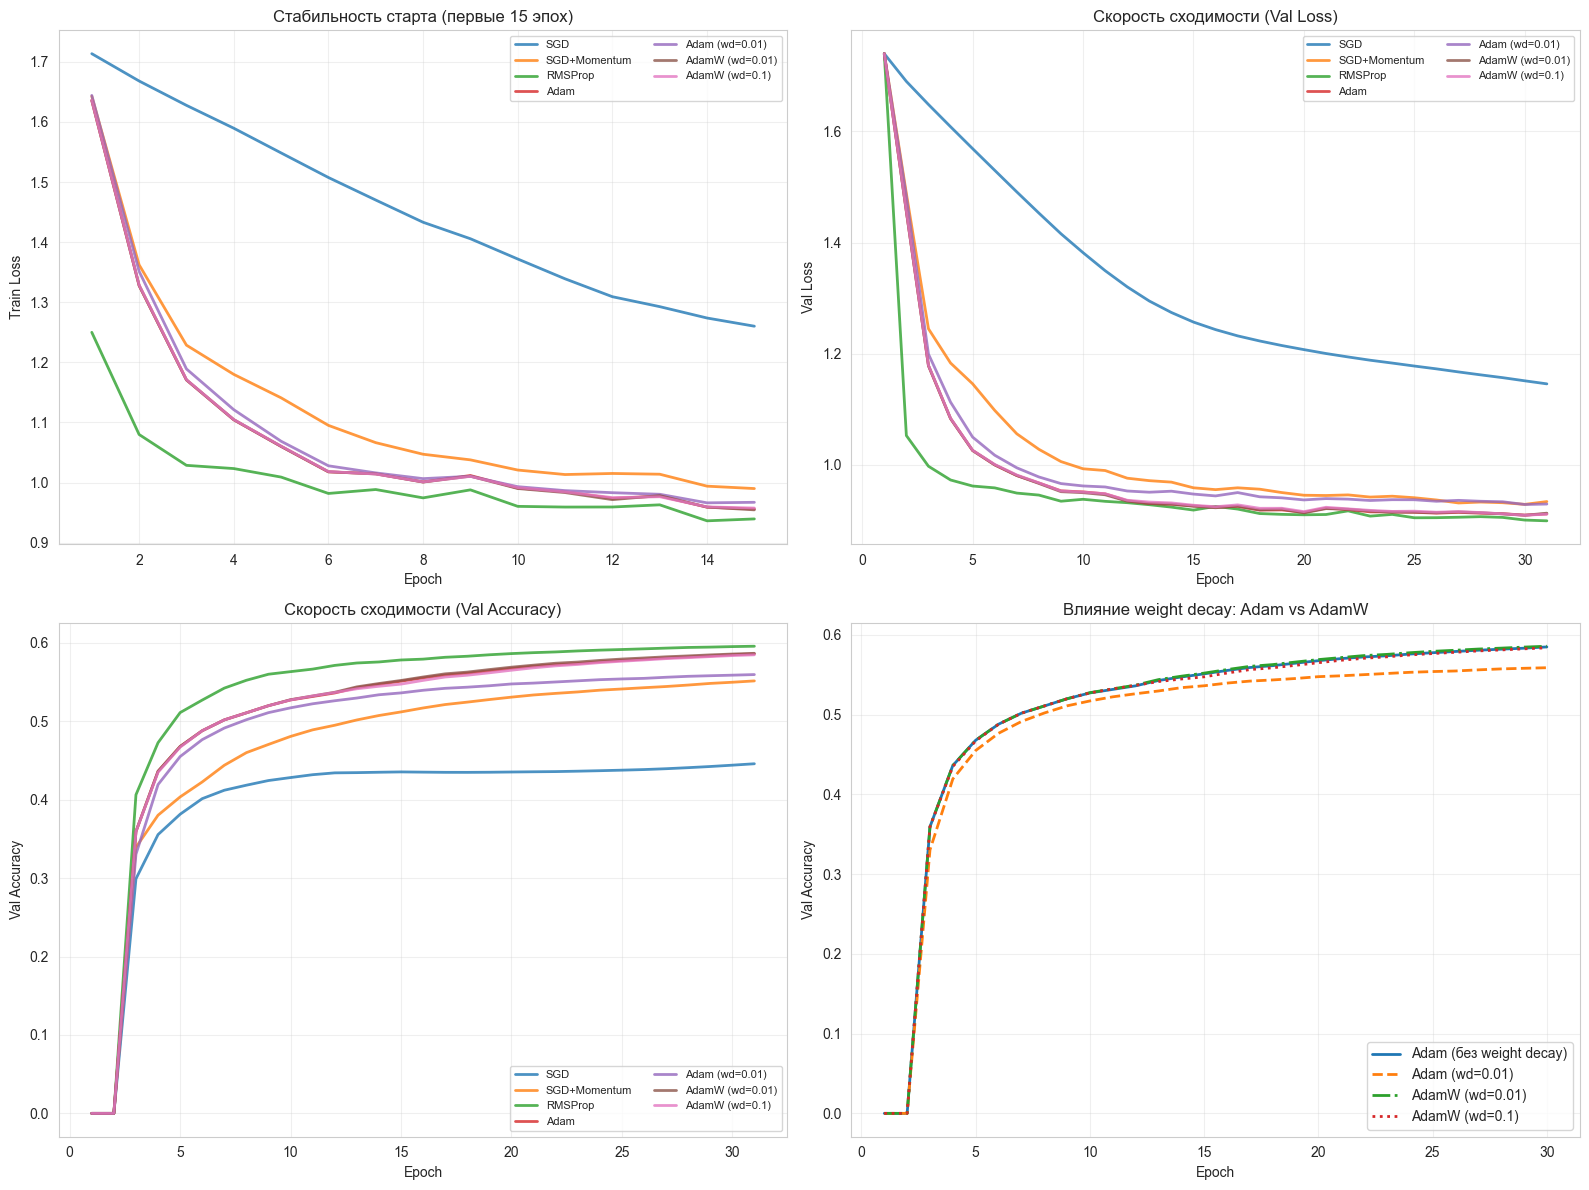


Анализ стабильности старта (Accuracy на 5-й эпохе):
SGD                      : Epoch 5 = 0.3814, Final = 0.4458, Improvement = 0.0644
SGD+Momentum             : Epoch 5 = 0.4035, Final = 0.5514, Improvement = 0.1480
RMSProp                  : Epoch 5 = 0.5110, Final = 0.5957, Improvement = 0.0846
Adam                     : Epoch 5 = 0.4678, Final = 0.5859, Improvement = 0.1181
Adam (wd=0.01)           : Epoch 5 = 0.4550, Final = 0.5595, Improvement = 0.1046
AdamW (wd=0.01)          : Epoch 5 = 0.4678, Final = 0.5866, Improvement = 0.1188
AdamW (wd=0.1)           : Epoch 5 = 0.4669, Final = 0.5847, Improvement = 0.1178

Сравнение Adam vs AdamW:
Adam (без wd):           0.5859
Adam (wd=0.01):         0.5595
AdamW (wd=0.01):        0.5866
AdamW (wd=0.1):         0.5847


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for opt_name in convergence_results.keys():
    train_losses = convergence_results[opt_name]['train_losses']
    epochs_train = range(1, min(len(train_losses), 15) + 1)
    axes[0, 0].plot(epochs_train, train_losses[:15], 
                   label=opt_name, linewidth=2, alpha=0.8)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Train Loss')
axes[0, 0].set_title('Стабильность старта (первые 15 эпох)')
axes[0, 0].legend(fontsize=8, ncol=2)
axes[0, 0].grid(True, alpha=0.3)

for opt_name in convergence_results.keys():
    val_losses = convergence_results[opt_name]['val_losses']
    epochs_val = range(1, len(val_losses) + 1)
    axes[0, 1].plot(epochs_val, val_losses, 
                   label=opt_name, linewidth=2, alpha=0.8)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val Loss')
axes[0, 1].set_title('Скорость сходимости (Val Loss)')
axes[0, 1].legend(fontsize=8, ncol=2)
axes[0, 1].grid(True, alpha=0.3)

for opt_name in convergence_results.keys():
    if len(convergence_results[opt_name]['val_accuracies']) > 0:
        val_accs = convergence_results[opt_name]['val_accuracies']
        epochs_acc = range(1, len(val_accs) + 1)
        axes[1, 0].plot(epochs_acc, val_accs, 
                       label=opt_name, linewidth=2, alpha=0.8)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Val Accuracy')
axes[1, 0].set_title('Скорость сходимости (Val Accuracy)')
axes[1, 0].legend(fontsize=8, ncol=2)
axes[1, 0].grid(True, alpha=0.3)

if 'Adam' in convergence_results and 'AdamW (wd=0.01)' in convergence_results:
    min_len = min(
        len(convergence_results['Adam']['val_accuracies']),
        len(convergence_results['Adam (wd=0.01)']['val_accuracies']),
        len(convergence_results['AdamW (wd=0.01)']['val_accuracies']),
        len(convergence_results['AdamW (wd=0.1)']['val_accuracies']) if 'AdamW (wd=0.1)' in convergence_results else 1000,
        30
    )
    adam_epochs = range(1, min_len + 1)
    adam_no_wd = convergence_results['Adam']['val_accuracies'][:min_len]
    adam_wd = convergence_results['Adam (wd=0.01)']['val_accuracies'][:min_len]
    adamw_wd_01 = convergence_results['AdamW (wd=0.01)']['val_accuracies'][:min_len]
    if 'AdamW (wd=0.1)' in convergence_results:
        adamw_wd_1 = convergence_results['AdamW (wd=0.1)']['val_accuracies'][:min_len]
    else:
        adamw_wd_1 = []
    
    axes[1, 1].plot(adam_epochs, adam_no_wd, label='Adam (без weight decay)', linewidth=2, linestyle='-')
    axes[1, 1].plot(adam_epochs, adam_wd, label='Adam (wd=0.01)', linewidth=2, linestyle='--')
    axes[1, 1].plot(adam_epochs, adamw_wd_01, label='AdamW (wd=0.01)', linewidth=2, linestyle='-.')
    if len(adamw_wd_1) > 0:
        axes[1, 1].plot(adam_epochs, adamw_wd_1, label='AdamW (wd=0.1)', linewidth=2, linestyle=':')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Val Accuracy')
    axes[1, 1].set_title('Влияние weight decay: Adam vs AdamW')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Анализ стабильности старта (Accuracy на 5-й эпохе):")
print("="*60)
for opt_name in convergence_results.keys():
    if len(convergence_results[opt_name]['val_accuracies']) >= 5:
        acc_5 = convergence_results[opt_name]['val_accuracies'][4]
        acc_final = convergence_results[opt_name]['val_accuracies'][-1]
        print(f"{opt_name:25s}: Epoch 5 = {acc_5:.4f}, Final = {acc_final:.4f}, "
              f"Improvement = {acc_final - acc_5:.4f}")

print("\n" + "="*60)
print("Сравнение Adam vs AdamW:")
print("="*60)
if 'Adam' in convergence_results:
    adam_final = convergence_results['Adam']['val_accuracies'][-1]
    print(f"Adam (без wd):           {adam_final:.4f}")
if 'Adam (wd=0.01)' in convergence_results:
    adam_wd_final = convergence_results['Adam (wd=0.01)']['val_accuracies'][-1]
    print(f"Adam (wd=0.01):         {adam_wd_final:.4f}")
if 'AdamW (wd=0.01)' in convergence_results:
    adamw_01_final = convergence_results['AdamW (wd=0.01)']['val_accuracies'][-1]
    print(f"AdamW (wd=0.01):        {adamw_01_final:.4f}")
if 'AdamW (wd=0.1)' in convergence_results:
    adamw_1_final = convergence_results['AdamW (wd=0.1)']['val_accuracies'][-1]
    print(f"AdamW (wd=0.1):         {adamw_1_final:.4f}")
